## Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn

In [2]:
auto_price = pd.read_csv('data/imports-85.csv', header=None)
auto_price.columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
                       'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type',
                       'num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower',
                       'peak_rpm','city_mpg','highway_mpg','price']
auto_price.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
auto_price = auto_price.replace('?', np.nan)

In [4]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [5]:
auto_price.iloc[:,:-1] = auto_price.iloc[:,:-1].fillna(auto_price.iloc[:,:-1].median())

In [6]:
auto_price['price'] = auto_price['price'].apply(pd.to_numeric, errors='coerce')
auto_price['price'] = auto_price['price'].fillna(auto_price['price'].mean())

In [7]:
auto_price['num_of_doors'].value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [8]:
auto_price['num_of_doors'] = auto_price['num_of_doors'].fillna('four')

In [9]:
auto_price.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [11]:
auto_price = auto_price.applymap(str)

In [12]:
import re
def convert_numeric(text):
    if re.match('\d*.[0-9]', text):
        value = float(text)
    else:
        value = text       
    return value
    
auto_price = auto_price.applymap(convert_numeric)

In [13]:
auto_price.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [14]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    float64
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

## Data preprocessing

In [15]:
auto_price.select_dtypes(include=['object']).head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [16]:
print(auto_price['num_of_doors'].value_counts())
print('--------------\n')
print(auto_price['num_of_cylinders'].value_counts())

four    116
two      89
Name: num_of_doors, dtype: int64
--------------

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64


In [17]:
updated_nums= {'num_of_doors': {'two': 2, 'four': 4},
              'num_of_cylinders': {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}}

In [18]:
auto_price.replace(updated_nums, inplace = True)

In [19]:
auto_price['symboling'] = auto_price['symboling'].astype(int)

In [20]:
# Categorical to binary numeric
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

columns = auto_price.select_dtypes(include=['object']).columns
auto_price[columns] = auto_price.select_dtypes(include=['object']).apply(lb.fit_transform)

In [21]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int32  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    int32  
 3   fuel_type          205 non-null    int32  
 4   aspiration         205 non-null    int32  
 5   num_of_doors       205 non-null    int64  
 6   body_style         205 non-null    int32  
 7   drive_wheels       205 non-null    int32  
 8   engine_location    205 non-null    int32  
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    float64
 14  engine_type        205 non-null    int32  
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

In [22]:
corr_matrix = auto_price.corr()

In [23]:
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
engine_size          0.861752
curb_weight          0.820825
horsepower           0.758769
width                0.728699
num_of_cylinders     0.687770
length               0.682986
wheel_base           0.583168
drive_wheels         0.576866
bore                 0.532307
fuel_system          0.516533
engine_location      0.331013
aspiration           0.177285
height               0.134388
normalized_losses    0.094337
stroke               0.082034
engine_type          0.071535
compression_ratio    0.070990
num_of_doors         0.041945
body_style          -0.072677
symboling           -0.082201
peak_rpm            -0.101546
fuel_type           -0.110207
make                -0.161471
city_mpg            -0.667449
highway_mpg         -0.690526
Name: price, dtype: float64

symboling               AxesSubplot(0.125,0.772143;0.110714x0.107857)
normalized_losses    AxesSubplot(0.257857,0.772143;0.110714x0.107857)
make                 AxesSubplot(0.390714,0.772143;0.110714x0.107857)
fuel_type            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
aspiration           AxesSubplot(0.656429,0.772143;0.110714x0.107857)
num_of_doors         AxesSubplot(0.789286,0.772143;0.110714x0.107857)
body_style              AxesSubplot(0.125,0.642714;0.110714x0.107857)
drive_wheels         AxesSubplot(0.257857,0.642714;0.110714x0.107857)
engine_location      AxesSubplot(0.390714,0.642714;0.110714x0.107857)
wheel_base           AxesSubplot(0.523571,0.642714;0.110714x0.107857)
length               AxesSubplot(0.656429,0.642714;0.110714x0.107857)
width                AxesSubplot(0.789286,0.642714;0.110714x0.107857)
height                  AxesSubplot(0.125,0.513286;0.110714x0.107857)
curb_weight          AxesSubplot(0.257857,0.513286;0.110714x0.107857)
engine_type         

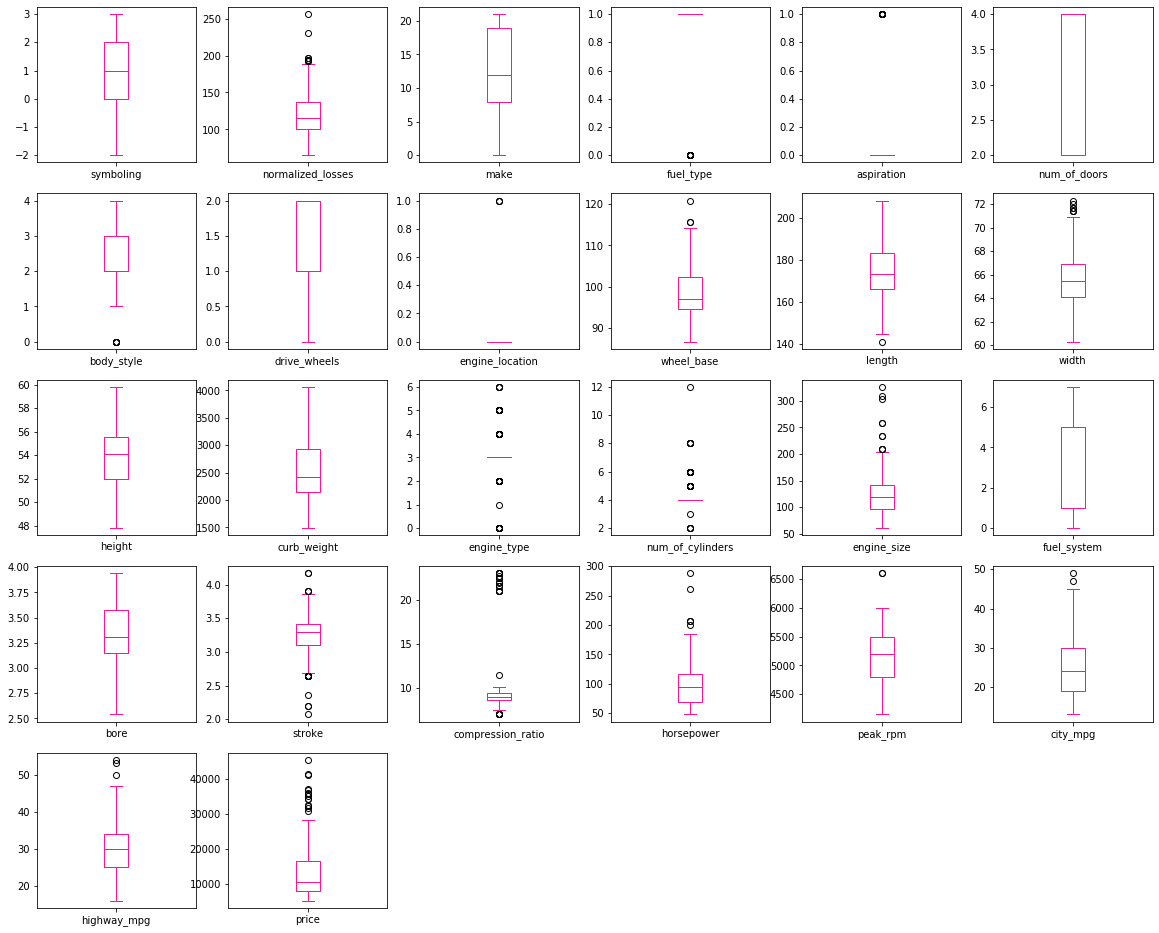

In [24]:
auto_price.plot(kind='box', subplots=True, layout=(6,6), figsize=(20, 20), color='deeppink')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BBB80A390>,
      dtype=object)

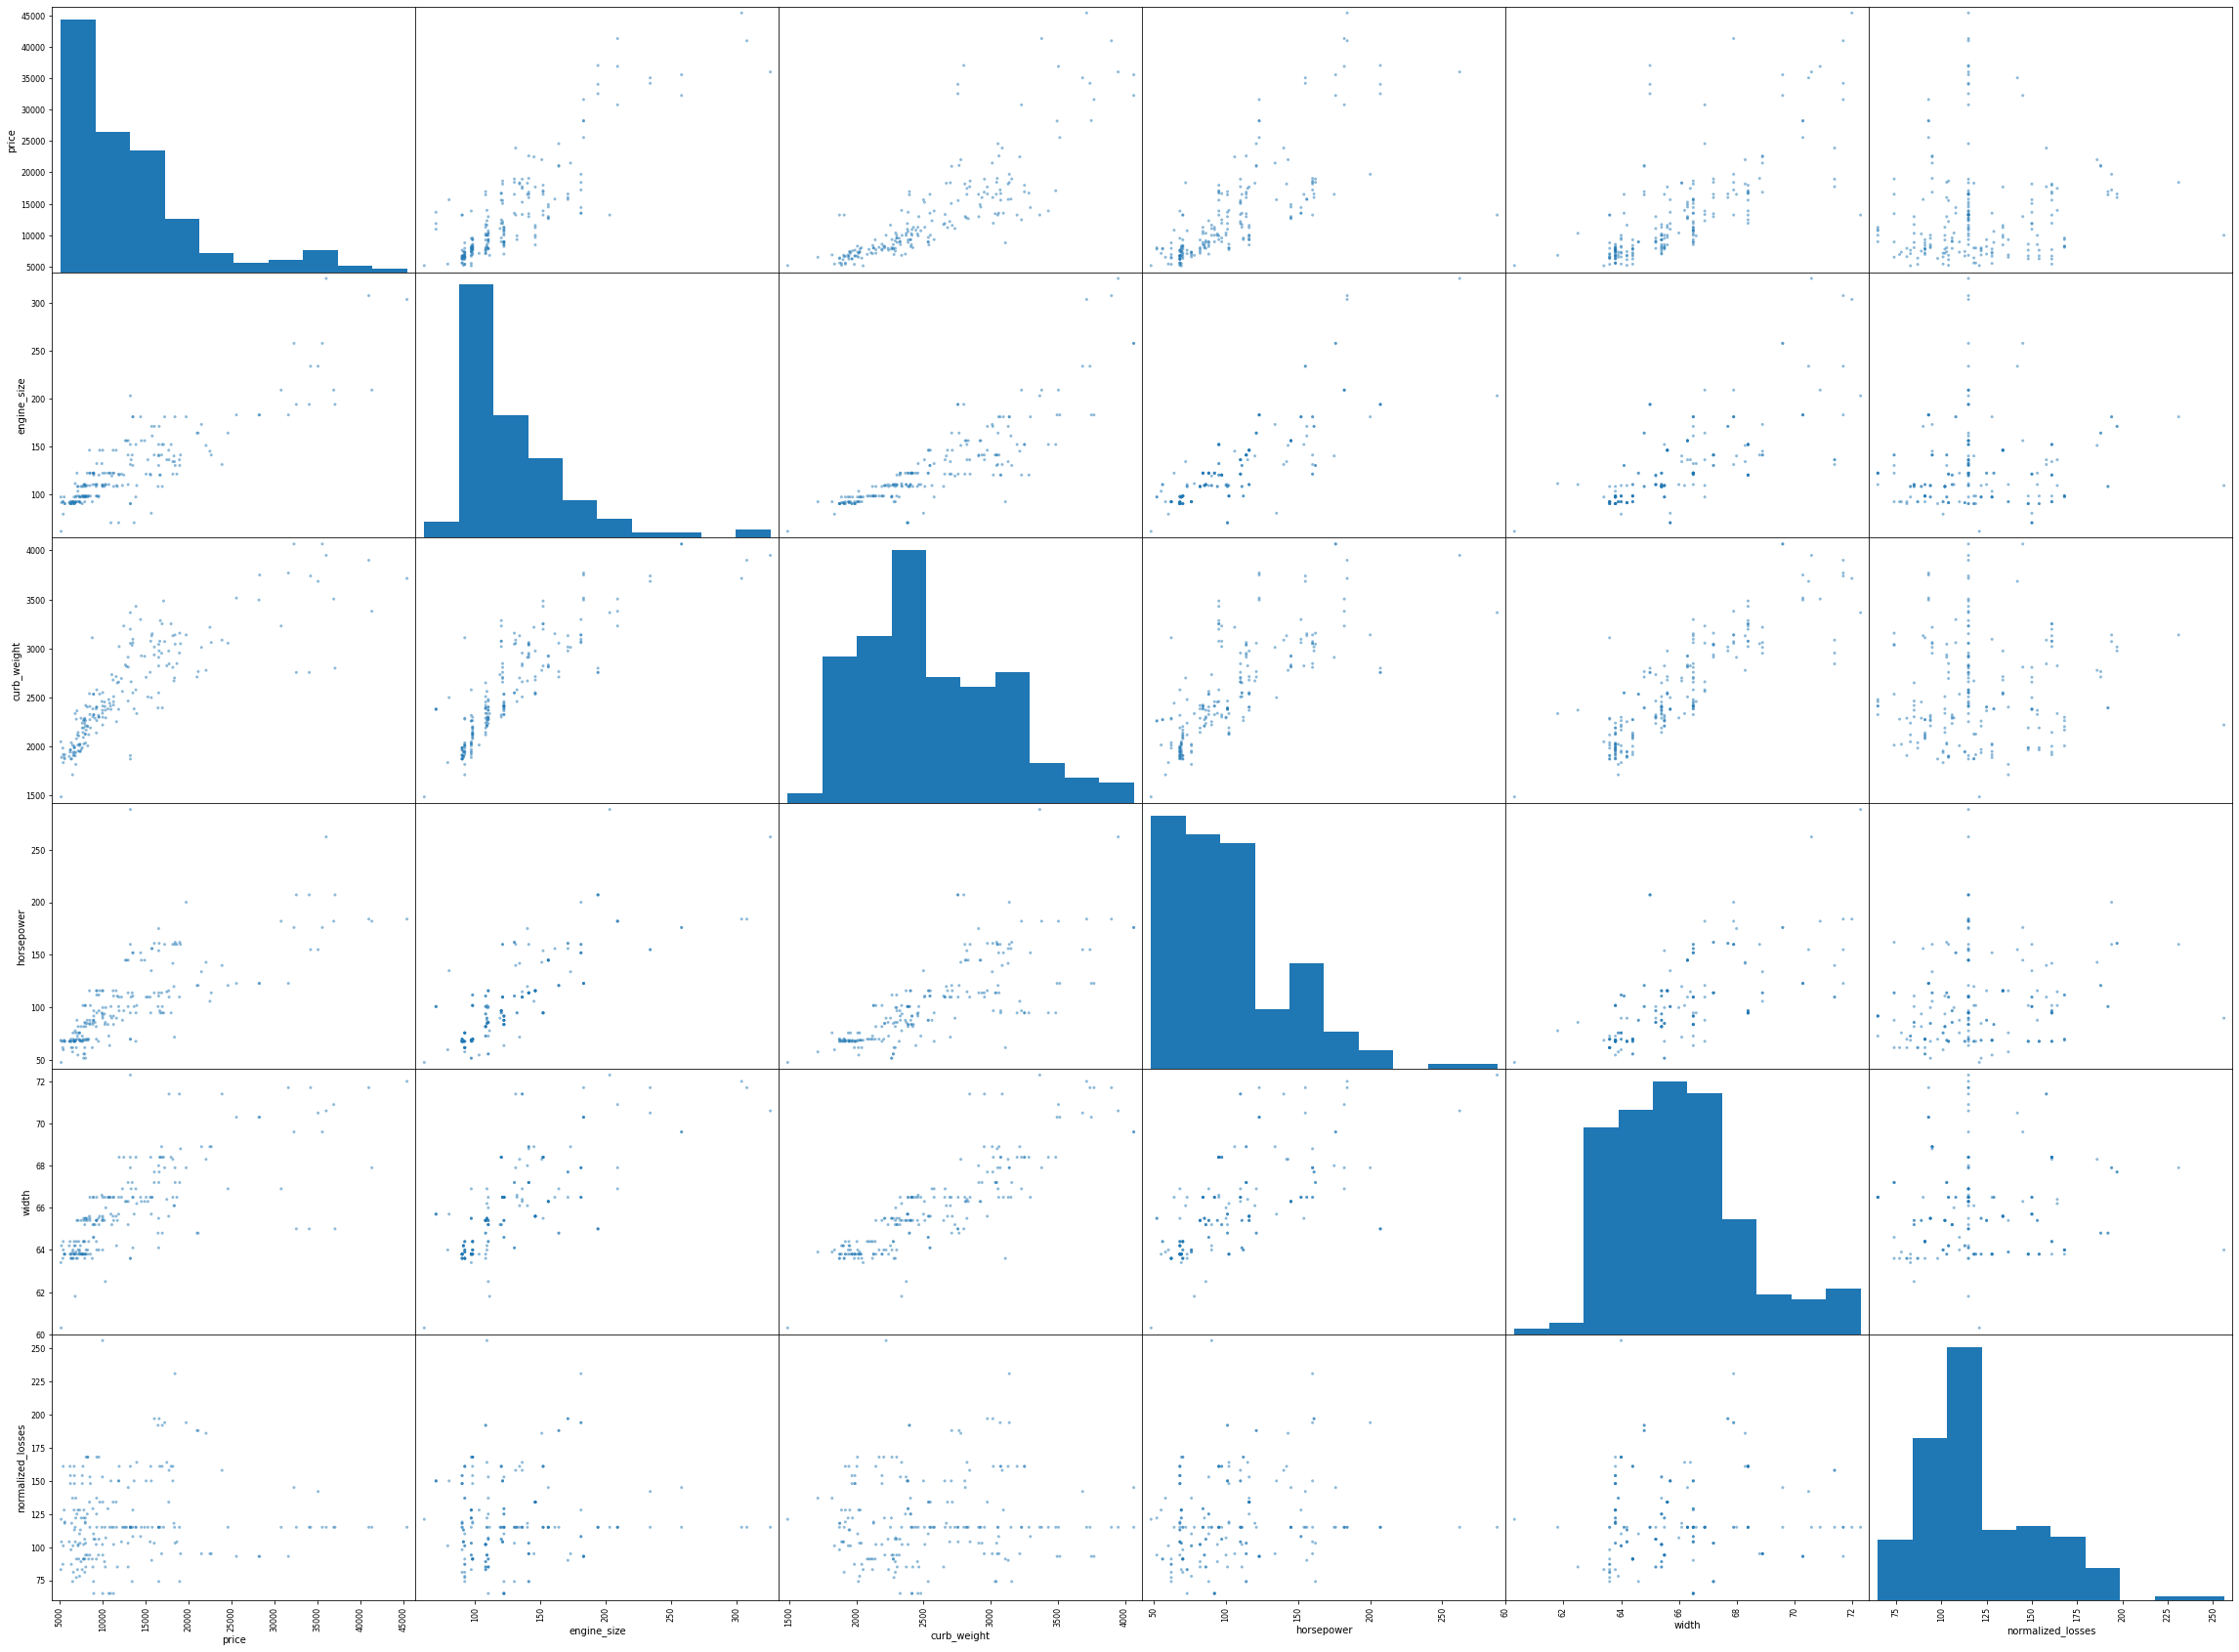

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(auto_price[['price','engine_size','curb_weight','horsepower','width','normalized_losses' ]], figsize=(40,30))

In [26]:
auto_price.describe()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,12.195122,0.902439,0.180488,3.131707,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329366,3.256098,10.142537,104.165854,5126.097561,25.219512,30.751220,13207.129353
std,1.245307,31.805105,6.274831,0.297446,0.385535,0.993715,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270858,0.313634,3.972040,39.529733,477.035772,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,8.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,12.000000,1.000000,0.000000,4.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,19.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,21.000000,1.000000,1.000000,4.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [29]:
auto_price[auto_price['width']>71] = auto_price['width'].median()

In [32]:
auto_price['width'].describe()

count    205.000000
mean      65.648293
std        1.762034
min       60.300000
25%       64.100000
50%       65.500000
75%       66.500000
max       70.900000
Name: width, dtype: float64

In [31]:
auto_price[auto_price['horsepower']>200] = auto_price['horsepower'].median()

In [33]:
auto_price['horsepower'].describe()

count    205.000000
mean      97.380488
std       32.824796
min       48.000000
25%       69.000000
50%       90.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

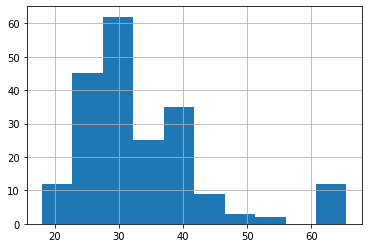

In [39]:
auto_price['highway_mpg'].hist()

In [40]:
auto_price[auto_price['highway_mpg']>60] = auto_price['highway_mpg'].median()

In [34]:
# Define features X
X = np.asarray(auto_price.iloc[:,:-1])
X[0:5]

array([[3.000e+00, 1.150e+02, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 8.860e+01, 1.688e+02, 6.410e+01,
        4.880e+01, 2.548e+03, 0.000e+00, 4.000e+00, 1.300e+02, 5.000e+00,
        3.470e+00, 2.680e+00, 9.000e+00, 1.110e+02, 5.000e+03, 2.100e+01,
        2.700e+01],
       [3.000e+00, 1.150e+02, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 8.860e+01, 1.688e+02, 6.410e+01,
        4.880e+01, 2.548e+03, 0.000e+00, 4.000e+00, 1.300e+02, 5.000e+00,
        3.470e+00, 2.680e+00, 9.000e+00, 1.110e+02, 5.000e+03, 2.100e+01,
        2.700e+01],
       [1.000e+00, 1.150e+02, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 9.450e+01, 1.712e+02, 6.550e+01,
        5.240e+01, 2.823e+03, 5.000e+00, 6.000e+00, 1.520e+02, 5.000e+00,
        2.680e+00, 3.470e+00, 9.000e+00, 1.540e+02, 5.000e+03, 1.900e+01,
        2.600e+01],
       [2.000e+00, 1.640e+02, 1.000e+00, 1.000e+00, 

In [35]:
# Define target y
y = np.asarray(auto_price['price'])
y[0:5]

array([13495., 16500., 16500., 13950., 17450.])

In [ ]:
# Standardize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

## Validation and Model Selection

### Train/Test Dataset
Let's split dataset into 80% train and 20% test set.

In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#### Validation on training set

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

#### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [ ]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standart deviation:', scores.std())

display_scores(lin_rmse_scores)

In [ ]:
import seaborn as sns
ax1=sns.distplot(y_train, hist=False, color='r',label='actual')
sns.distplot(y_pred, hist=False,color='b',label='pred',ax=ax1)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

#### Validation on training set

In [ ]:
y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train,y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

#### Cross-validation

In [ ]:
tree_scores = cross_val_score(tree_reg, X, y, scoring='neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)

#### Validation on training set

In [ ]:
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

#### Cross-validation

In [ ]:
forest_scores = cross_val_score(forest_reg, X, y, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
import seaborn as sns
ax1=sns.distplot(y_train, hist=False, color='r',label='actual')
sns.distplot(y_pred, hist=False,color='b',label='pred',ax=ax1)

In [ ]:
import seaborn as sns
ax1=sns.distplot(y_test, hist=False, color='r',label='actual')
sns.distplot(y_pred, hist=False,color='b',label='pred',ax=ax1)

### SGD

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l1', eta0=0.01)
sgd_reg.fit(X_train, y_train)

#### Validation on training set

In [ ]:
y_pred = sgd_reg.predict(X_train)
sgd_mse = mean_squared_error(y_train, y_pred)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

#### Cross-validation

In [ ]:
sgd_scores = cross_val_score(sgd_reg, X, y, scoring='neg_mean_squared_error', cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)
display_scores(sgd_rmse_scores)

### Ridge

In [ ]:
from sklearn.linear_model import Ridge

RMSE_train=[]
RMSE_cv=[]

alphas = [0.1, 1, 10, 100, 200]

for alpha in alphas:
    RM = Ridge(alpha=alpha)
    RM.fit(X_train, y_train)
    y_pred = RM.predict(X_train)
    ridge_mse = mean_squared_error(y_train, y_pred)
    ridge_rmse = np.sqrt(ridge_mse)
    RMSE_train.append(ridge_rmse)
    
    ridge_scores = cross_val_score(RM, X, y, scoring='neg_mean_squared_error', cv=10)
    ridge_rmse_scores = np.sqrt(-ridge_scores)
    RMSE_cv.append(ridge_rmse_scores.mean())

In [ ]:
import matplotlib.pyplot as plt

plt.plot(alphas, RMSE_train, '-g', label='train set errors')
plt.plot(alphas, RMSE_cv, ':b', label='cross validation errors')
plt.xlabel('alpha')
plt.ylabel('RMSE')

plt.legend();

In [ ]:

ridge_reg = Ridge(alpha=100, solver='cholesky')
ridge_reg.fit(X_train,y_train)

In [ ]:
y_pred = ridge_reg.predict(X_train)
ridge_mse = mean_squared_error(y_train, y_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

In [ ]:
ridge_scores = cross_val_score(ridge_reg, X, y, scoring='neg_mean_squared_error', cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

#### Save the models

In [ ]:
import joblib
joblib.dump(lin_reg, 'lin_reg.pkl')
joblib.dump(tree_reg, 'tree_reg.pkl')
joblib.dump(forest_reg, 'forest_reg.pkl')
joblib.dump(forest_reg, 'ridge_reg.pkl')
joblib.dump(forest_reg, 'sgd_reg.pkl')

### Comparing model performances

In [ ]:
new_df= {'linear_regression': [lin_rmse, lin_rmse_scores.mean()],
         'decision_tree': [tree_rmse, tree_rmse_scores.mean()],
         'random_forest': [forest_rmse, forest_rmse_scores.mean()],
         'SGD': [sgd_rmse, sgd_rmse_scores.mean()],
         'ridge': [ridge_rmse, ridge_rmse_scores.mean()]
         }

new_df = pd.DataFrame(new_df, index=['train_set_val','cross_val'])
new_df

### Fine-Tuning the Model